# Descriptive Analysis

In [37]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Importing data
df = pd.read_csv('../Data/cleaned_fetal_health.csv')
df.head()

# separating features and target variable
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

In [38]:
X.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability'],
      dtype='object')

### Summary Statistics

In [39]:
# Calculate and print mean and standard deviation for all variables
for column in X.columns:
    mean = X[column].mean().__round__(3)
    std = X[column].std().__round__(3)
    print(f"{column}: Mean = {mean}, SD = {std}\n")

baseline value: Mean = 133.304, SD = 9.841

accelerations: Mean = 0.003, SD = 0.004

fetal_movement: Mean = 0.009, SD = 0.047

uterine_contractions: Mean = 0.004, SD = 0.003

light_decelerations: Mean = 0.002, SD = 0.003

severe_decelerations: Mean = 0.0, SD = 0.0

prolongued_decelerations: Mean = 0.0, SD = 0.001

abnormal_short_term_variability: Mean = 46.99, SD = 17.193

mean_value_of_short_term_variability: Mean = 1.333, SD = 0.883

percentage_of_time_with_abnormal_long_term_variability: Mean = 9.847, SD = 18.397

mean_value_of_long_term_variability: Mean = 8.188, SD = 5.628



In [40]:
X['severe_decelerations'].value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

### Exploratory visualizations

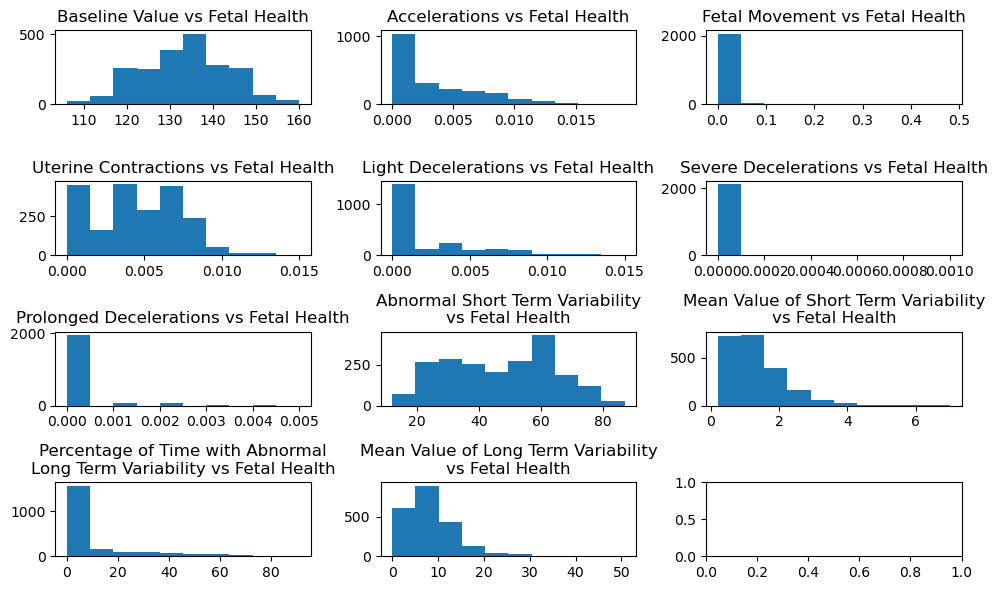

In [41]:
# Histograms showing distribution for each feature 
fig, ax = plt.subplots(4, 3, figsize=(10, 6))

ax[0,0].hist(X['baseline value'])
ax[0,0].set_title('Baseline Value vs Fetal Health')

ax[0,1].hist(X['accelerations'])
ax[0,1].set_title('Accelerations vs Fetal Health')

ax[0,2].hist(X['fetal_movement'])
ax[0,2].set_title('Fetal Movement vs Fetal Health')

ax[1,0].hist(X['uterine_contractions'])
ax[1,0].set_title('Uterine Contractions vs Fetal Health')

ax[1,1].hist(X['light_decelerations'])
ax[1,1].set_title('Light Decelerations vs Fetal Health')

ax[1,2].hist(X['severe_decelerations'])
ax[1,2].set_title('Severe Decelerations vs Fetal Health')

ax[2,0].hist(X['prolongued_decelerations'])
ax[2,0].set_title('Prolonged Decelerations vs Fetal Health') 

ax[2,1].hist(X['abnormal_short_term_variability'])
ax[2,1].set_title('Abnormal Short Term Variability\nvs Fetal Health')

ax[2,2].hist(X['mean_value_of_short_term_variability'])
ax[2,2].set_title('Mean Value of Short Term Variability\nvs Fetal Health')

ax[3,0].hist(X['percentage_of_time_with_abnormal_long_term_variability'])
ax[3,0].set_title('Percentage of Time with Abnormal\nLong Term Variability vs Fetal Health')

ax[3,1].hist(X['mean_value_of_long_term_variability'])
ax[3,1].set_title('Mean Value of Long Term Variability\nvs Fetal Health')


plt.tight_layout()
plt.show()

In [45]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

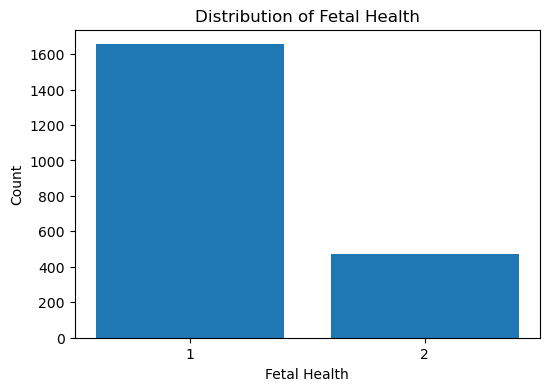

In [ ]:
# Histogram for fetal health
plt.figure(figsize=(6,4))
# create counts to count number of times 1 or 2 appears 
counts = y.value_counts().sort_index()

# create bar chart using counts 
plt.bar(counts.index, counts.values)

# create x-ticks for 1 or 2 
plt.xticks(counts.index)

# add title and axis labels 
plt.title('Distribution of Fetal Health')
plt.xlabel('Fetal Health')
plt.ylabel('Count')

plt.show()

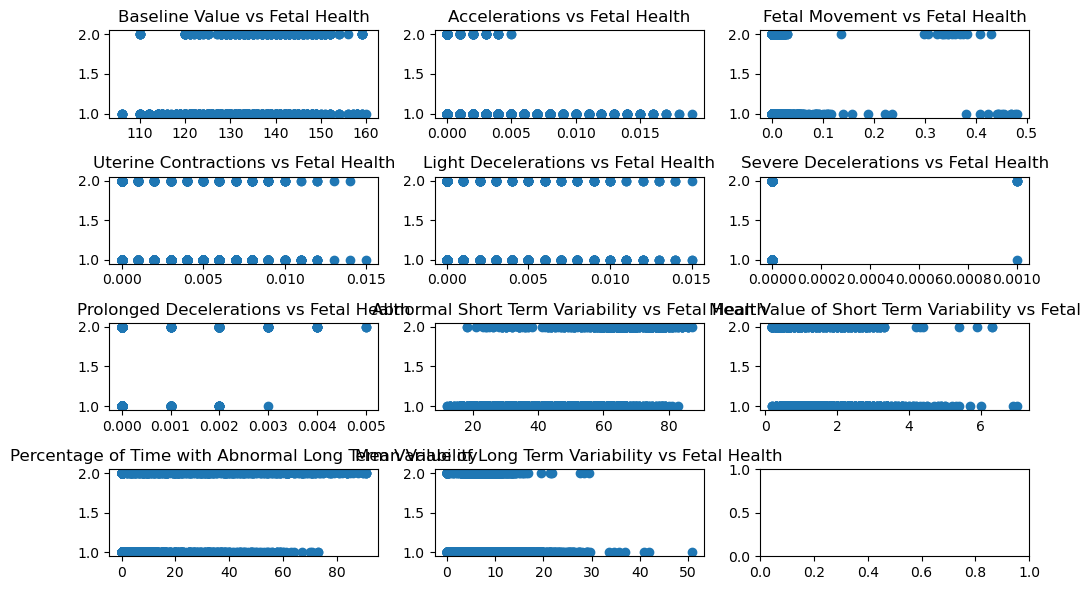

In [43]:
# Scatterplot comparing all variables to target variable 
fig, ax = plt.subplots(4, 3, figsize=(10, 6))

ax[0,0].scatter(X['baseline value'], y)
ax[0,0].set_title('Baseline Value vs Fetal Health')

ax[0,1].scatter(X['accelerations'], y)
ax[0,1].set_title('Accelerations vs Fetal Health')

ax[0,2].scatter(X['fetal_movement'], y)
ax[0,2].set_title('Fetal Movement vs Fetal Health')

ax[1,0].scatter(X['uterine_contractions'], y)
ax[1,0].set_title('Uterine Contractions vs Fetal Health')

ax[1,1].scatter(X['light_decelerations'], y)
ax[1,1].set_title('Light Decelerations vs Fetal Health')

ax[1,2].scatter(X['severe_decelerations'], y)
ax[1,2].set_title('Severe Decelerations vs Fetal Health')

ax[2,0].scatter(X['prolongued_decelerations'], y)
ax[2,0].set_title('Prolonged Decelerations vs Fetal Health') 

ax[2,1].scatter(X['abnormal_short_term_variability'], y)
ax[2,1].set_title('Abnormal Short Term Variability vs Fetal Health')

ax[2,2].scatter(X['mean_value_of_short_term_variability'], y)
ax[2,2].set_title('Mean Value of Short Term Variability vs Fetal')

ax[3,0].scatter(X['percentage_of_time_with_abnormal_long_term_variability'], y)
ax[3,0].set_title('Percentage of Time with Abnormal Long Term Variability')

ax[3,1].scatter(X['mean_value_of_long_term_variability'], y)
ax[3,1].set_title('Mean Value of Long Term Variability vs Fetal Health')


plt.tight_layout()
plt.show()